In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [16]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()



In [17]:
len(X_train)

60000

In [18]:
len(X_test)

10000

In [19]:
X_train[0].shape

(28, 28)

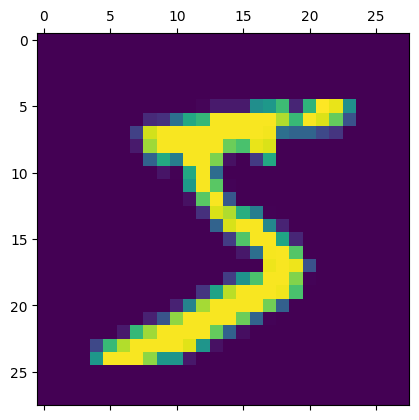

In [20]:
plt.matshow(X_train[0])
#plt.imshow(X_train[0])

In [21]:
Y_train[2]

4

In [22]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [23]:
X_train.shape

(60000, 28, 28)

In [ ]:
#Normalization :run this code after we train the model to get more accurate results
X_train =X_train / 255
X_test =X_test / 255

In [25]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [26]:
X_train_flattened.shape

(60000, 784)

In [27]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [28]:
model = Sequential()
model.add(Dense(10 ,input_shape=(784,),activation='sigmoid'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(X_train_flattened,Y_train,epochs=5)





Epoch 1/5


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4712 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3042 - accuracy: 0.9160
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2735 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2669 - accuracy: 0.9257


In [29]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2668 - accuracy: 0.9260


[0.2668449580669403, 0.9259999990463257]

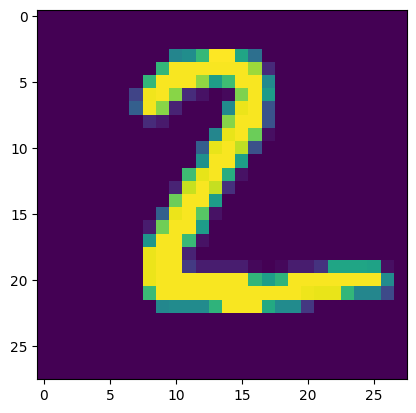

In [30]:
plt.imshow(X_test[1])

In [31]:
Y_predicted=model.predict(X_test_flattened)
#X_test_flattened[0]

313/313 [==============================] - 0s 966us/step


In [ ]:
Y_predicted[1]
# if you want to turn confusion matrix, make sure you have a list or predicted results
Y_predicted_labels =[np.argmax(i) for i in Y_predicted]

In [33]:
np.argmax(Y_predicted[1])

2

In [34]:
cm= tf.math.confusion_matrix(labels=Y_test, predictions= Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,    9,  925,   17,    9,    3,   12,   10,   37,    4],
       [   4,    0,   18,  929,    1,   22,    2,    9,   17,    8],
       [   1,    1,    3,    2,  915,    0,   11,    3,    8,   38],
       [  10,    3,    3,   35,    9,  776,   15,    5,   29,    7],
       [  14,    3,    6,    1,    8,   10,  912,    2,    2,    0],
       [   1,    8,   22,    9,    8,    0,    0,  937,    1,   42],
       [  10,   13,    5,   25,    9,   26,   10,   10,  850,   16],
       [  11,    7,    1,   10,   23,    8,    0,   12,    4,  933]])>

Text(95.72222222222221, 0.5, 'Truth')

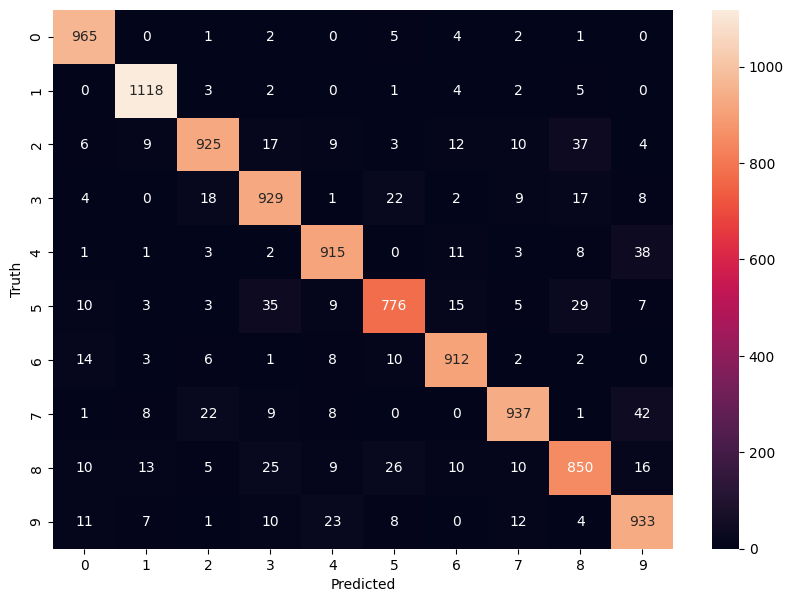

In [35]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [36]:
model = Sequential()
model.add(Dense(100 ,input_shape=(784,),activation='relu'))
model.add(Dense(10 ,activation='sigmoid'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2661 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1181 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0825 - accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0634 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0509 - accuracy: 0.9841


In [37]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9769


[0.07734985649585724, 0.9768999814987183]

313/313 [==============================] - 0s 963us/step


Text(95.72222222222221, 0.5, 'Truth')

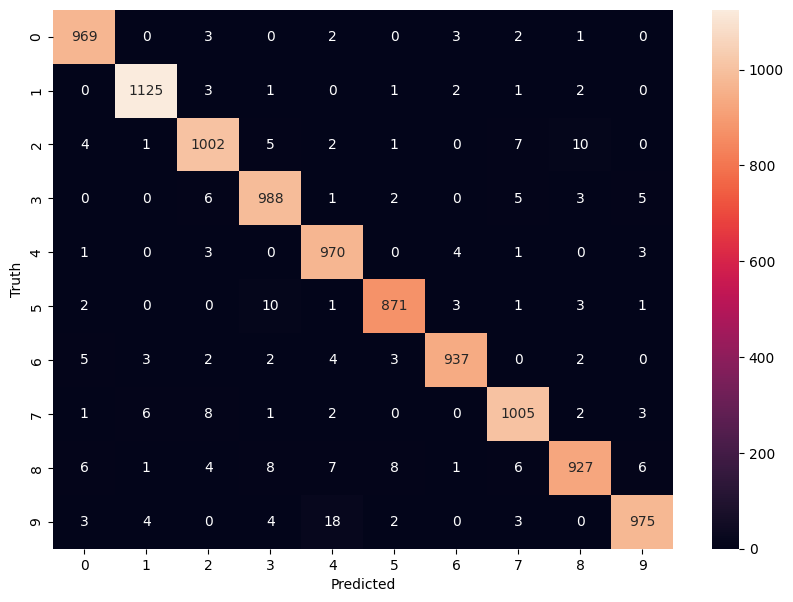

In [38]:
Y_predicted=model.predict(X_test_flattened)
# if you want to urn confusion matrix, make sure you have a list or predicted results
Y_predicted_labels =[np.argmax(i) for i in Y_predicted]
cm= tf.math.confusion_matrix(labels=Y_test, predictions= Y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')



In [41]:
model = Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(Dense(500 ,activation='relu'))
model.add(Dense(500 ,activation='relu'))
model.add(Dense(10 ,activation='sigmoid'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1837 - accuracy: 0.9451
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0814 - accuracy: 0.9752
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0567 - accuracy: 0.9820
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0413 - accuracy: 0.9873
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0344 - accuracy: 0.9889
